# **Customer Segmentation of online retail**

---
We are working in the online retail company as data scientist. So you have been provided invoice data of the customer. Your aim is to check out the customers behavior based on the CutomerId, InvoiceNo, Quantity,UnitPrice and Country etc. This is an unsupervised leaning project.

## **About the Dataset:**

---
![alt text](https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b-506/6beb483b-ff9f-4e16-bb1b-3750a2d84f73/file.png)

## **Attribue Description**

---
|Features|Description|
|-----|-----|
|Invoice | Invoice number | 
|StockCode|Stock code| 
|Description|Items details| 
|Quantity|Quantity purchase by customer|
|InvoiceDate |Invoice Date on which item purchased|
|UnitPrice|Price of the item|
|CustomerID|Customer id|
|Country|Country name|


## **Importing Required Libraries**

---



In [0]:
#Importing all Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style

plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns #Data Visualisation
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Upload file on google Colab
from google.colab import files
uploaded = files.upload()

Saving retail.csv to retail (3).csv


In [162]:
#Loading The Dataset
import io
#The command written below is generally used to load .xlsx format file 
df = pd.read_csv(io.BytesIO(uploaded['retail.csv']))
df.head(5)

,ID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [163]:
df.dropna(inplace=True)
df=df[df['Country']=='United Kingdom']

df['Return']=df.InvoiceNo.str.contains('C')

df['Purchase']=np.where(df["Return"]==True,0,1)
df.tail()

,ID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase
541889,541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.00,United Kingdom,False,1
541890,541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.00,United Kingdom,False,1
541891,541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.00,United Kingdom,False,1
541892,541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.00,United Kingdom,False,1
541893,541893,581586,20685,DOORMAT RED RETROSPOT,10,12/9/2011 12:49,7.08,13113.00,United Kingdom,False,1


## **Calculate Recency**

---
The recency variable refers to the number of days that have elapsed since the customer last purchased something (so, smaller numbers indicate more recent activity on the customer’s account).


In [164]:
customers = pd.DataFrame({'CustomerID': df['CustomerID'].unique()},dtype=int)

# calculate the recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Recency'] = pd.to_datetime("2011-12-10") - (df['InvoiceDate'])

# remove the time factor
df.Recency = df.Recency.dt.days

# purchase equal to one 
temp= df[df['Purchase']==1]

# customers latest purchase day
recency=temp.groupby(by='CustomerID',as_index=False).min()
customers=customers.merge(recency[['CustomerID','Recency']],on='CustomerID')

df.head(5)

,ID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase,Recency
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,False,1,373
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,1,373
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,False,1,373
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,1,373
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,1,373


## **Calculate Frequency of Purchase**

---
Frequency refers to the number of invoices with purchases during the year. 


In [0]:
temp_1=df[['Purchase','InvoiceNo','CustomerID']]
temp_1.drop_duplicates(subset=['InvoiceNo'],inplace=True)
annual_invoice=temp_1.groupby(by='CustomerID',as_index=False).sum()
annual_invoice.rename(columns={'Purchase':'Frequency'},inplace=True)
customers=customers.merge(annual_invoice,on='CustomerID')

In [166]:
df['Frequency']=customers['Frequency']
df.head(5)

,ID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase,Recency,Frequency
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,False,1,373,34.00
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,1,373,10.00
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,False,1,373,5.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,1,373,3.00
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,1,373,15.00


## **Calculate Monetary**

---



In [167]:
df['Amount']=df['Quantity'] * df['UnitPrice']
annual_sales=df.groupby(by='CustomerID',as_index=False).sum()
annual_sales.rename(columns={'Amount':'monetary'},inplace=True)

# added in the customer dataframe
customers=customers.merge(annual_sales[['CustomerID','monetary']],on='CustomerID')
customers

,CustomerID,Recency,Frequency,monetary
0,17850,372,34,5288.63
1,13047,31,10,3079.10
2,13748,95,5,948.25
3,15100,333,3,635.10
4,15291,25,15,4596.51
...,...,...,...,...
3916,15471,2,1,469.48
3917,13436,1,1,196.89
3918,15520,1,1,343.50
3919,13298,1,1,360.00


In [0]:
df['Monetary']=customers['monetary']

In [169]:
#Final dataframe
df.head(4)

,ID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase,Recency,Frequency,Amount,Monetary
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,False,1,373,34.00,15.30,5288.63
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,1,373,10.00,20.34,3079.10
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,False,1,373,5.00,22.00,948.25
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,1,373,3.00,20.34,635.10


## **Log Transformation of Clusters for proper Visualisation**

---



In [0]:
customers['monetary']=np.where(customers['monetary']<0,0,customers['monetary'])    

# log transform
customers['Recency_log']=np.log(customers['Recency']+0.1) # there values equals to zero to avoid log zero increase by +0.1
customers['Frequency_log']=np.log(customers['Frequency'])
customers['Monetary_log']=np.log(customers['monetary']+0.1)

## **Selection of Optimum Number of Clusters**

---



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'No. of Clusters')

Text(0, 0.5, 'wcss')

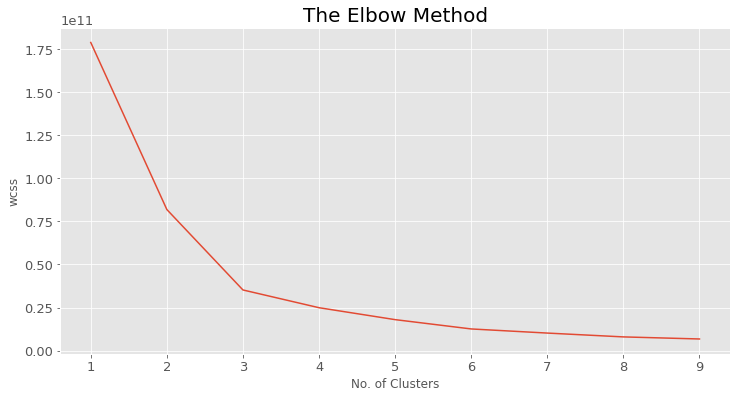

In [177]:
from sklearn.cluster import KMeans
dist= []  # Create an empty list to store value of wcss
for i in range(1, 10): #provide a range of number of clusters
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) #intialize kmeans algorithm
    km.fit(customers) 
    dist.append(km.inertia_) # Append the values 
plt.figure(figsize=(12,6))   
plt.plot(range(1, 10),dist)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()



## **Visualisation of Clusters Using Kmeans**

---



In [0]:
new_df=customers[['Frequency_log','Monetary_log']]
X=new_df.values
cluster = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# create 'cluster' column
y_kmeans= cluster.fit_predict(customers.iloc[:,1:7])

# plot the cluster



<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Frequency vs monetary')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'monetary')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text xticklabel objects>)

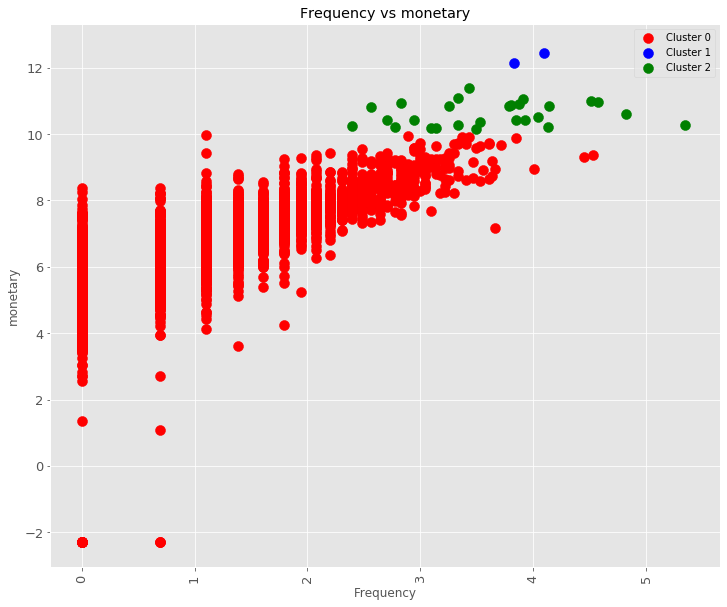

In [194]:
plt.figure(figsize=(12,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100, c = 'green', label = 'Cluster 2')
plt.title('Frequency vs monetary')
plt.xlabel('Frequency')
plt.ylabel('monetary')
plt.xticks(rotation=90)
plt.legend()
plt.show()